In [1]:
%load_ext autoreload
%autoreload 2

In [13]:
import json
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import jsonlines

from utils import *

/home/marluxiaboss/anaconda3/envs/llm_detector/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Experiment 1

## distil_roberta-base

In [15]:
detector = "distil_roberta-base"
training_method = "adapter"
model_code = "10_04_0945"
eval_acc_df, degrad_loss_df, training_loss_df = create_df_from_training_logs(detector, training_method, model_code)

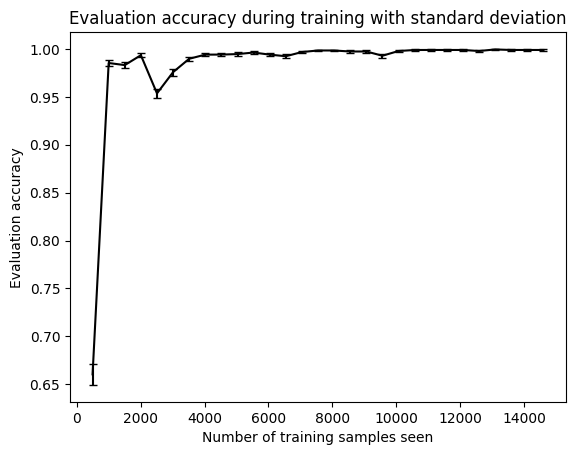

In [16]:
plot_eval_acc_vs_nb_samples(eval_acc_df)

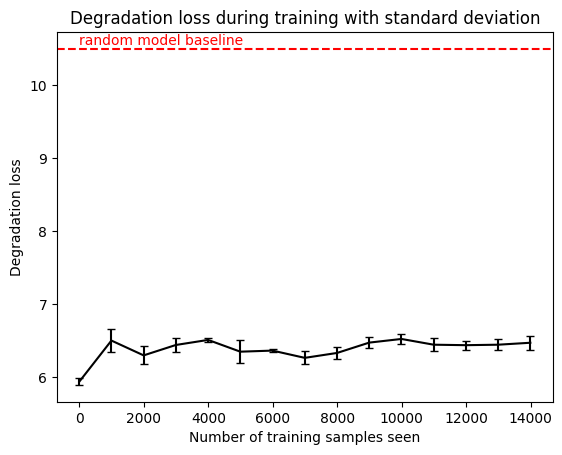

In [17]:
plot_degrad_loss_vs_nb_samples(degrad_loss_df)

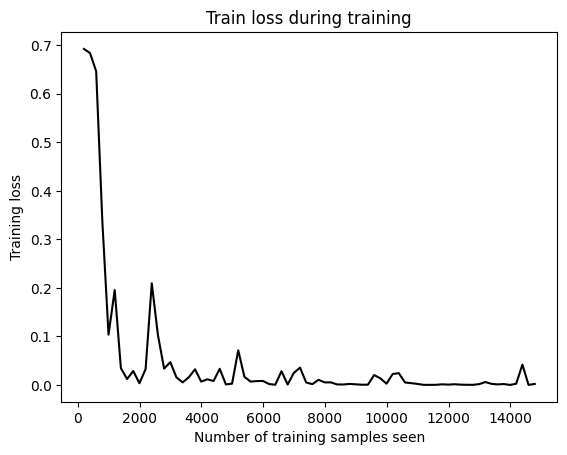

In [18]:
plot_training_loss_vs_nb_samples(training_loss_df)

In [19]:
detector = "distil_roberta-base"
training_method = "full_finetuning"
model_code = "10_04_1107"
eval_acc_df, degrad_loss_df, training_loss_df = create_df_from_training_logs(detector, training_method, model_code)

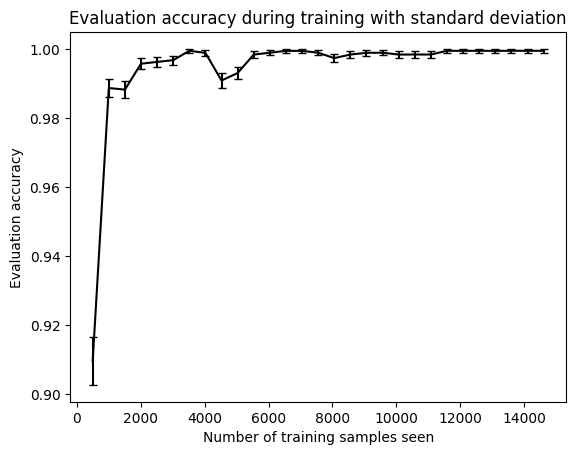

In [20]:
plot_eval_acc_vs_nb_samples(eval_acc_df)

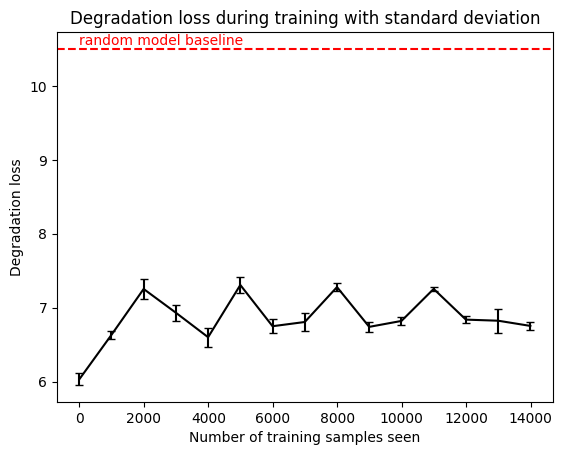

In [21]:
plot_degrad_loss_vs_nb_samples(degrad_loss_df)

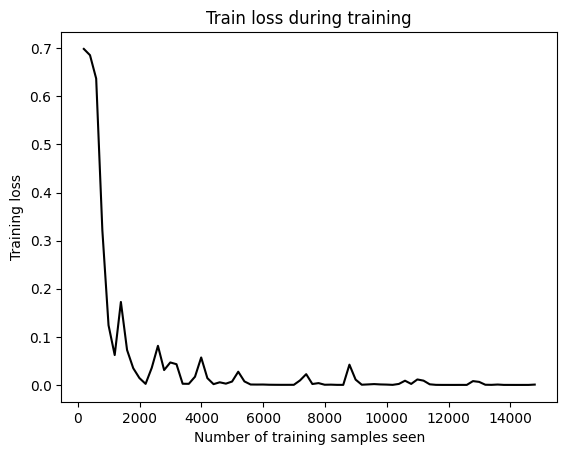

In [22]:
plot_training_loss_vs_nb_samples(training_loss_df)

## roberta_large

In [23]:
detector = "roberta_large"
training_method = "adapter"
model_code = "10_04_1148"
eval_acc_df, degrad_loss_df, training_loss_df = create_df_from_training_logs(detector, training_method, model_code)

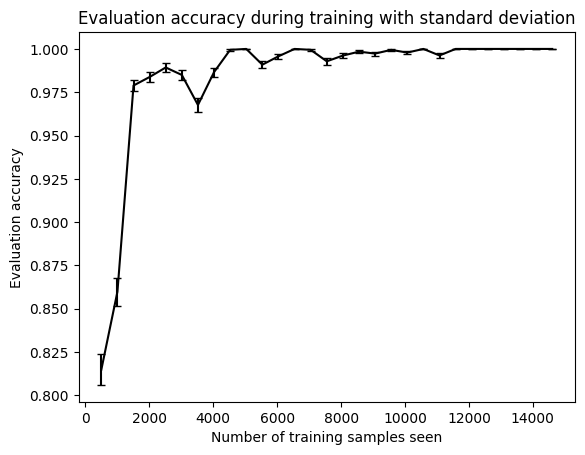

In [24]:
plot_eval_acc_vs_nb_samples(eval_acc_df)

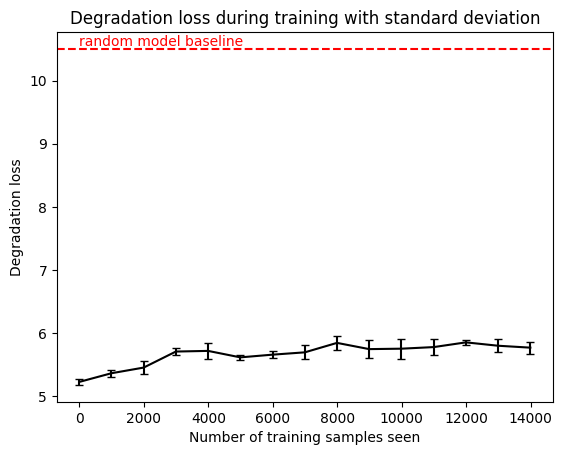

In [25]:
plot_degrad_loss_vs_nb_samples(degrad_loss_df)

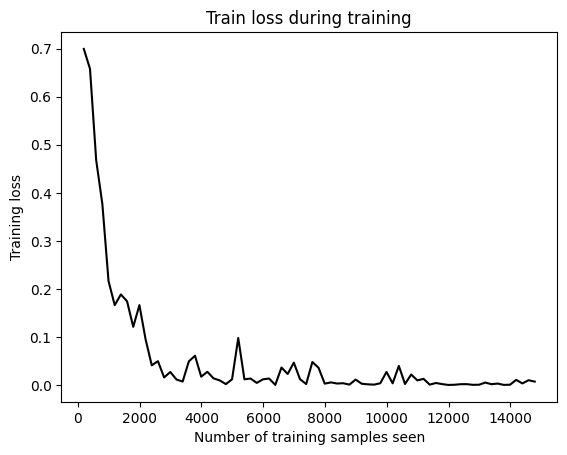

In [26]:
plot_training_loss_vs_nb_samples(training_loss_df)

In [27]:
detector = "roberta_large"
training_method = "full_finetuning"
model_code = "10_04_1220"
eval_acc_df, degrad_loss_df, training_loss_df = create_df_from_training_logs(detector, training_method, model_code)

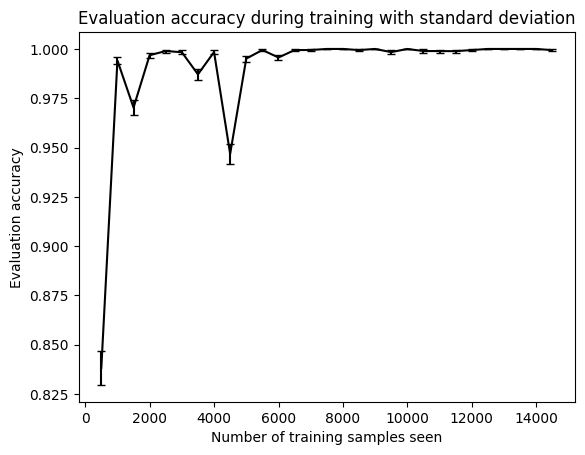

In [28]:
plot_eval_acc_vs_nb_samples(eval_acc_df)

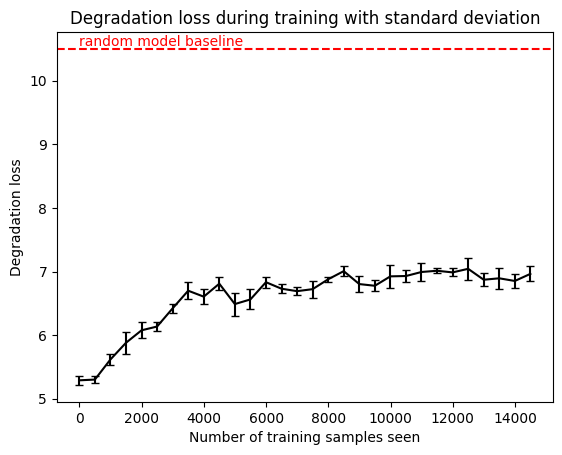

In [29]:
plot_degrad_loss_vs_nb_samples(degrad_loss_df)

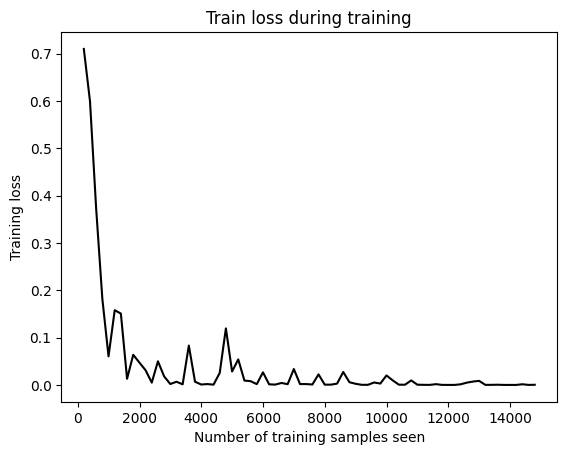

In [30]:
plot_training_loss_vs_nb_samples(training_loss_df)

# Experiment 2

## freeze base

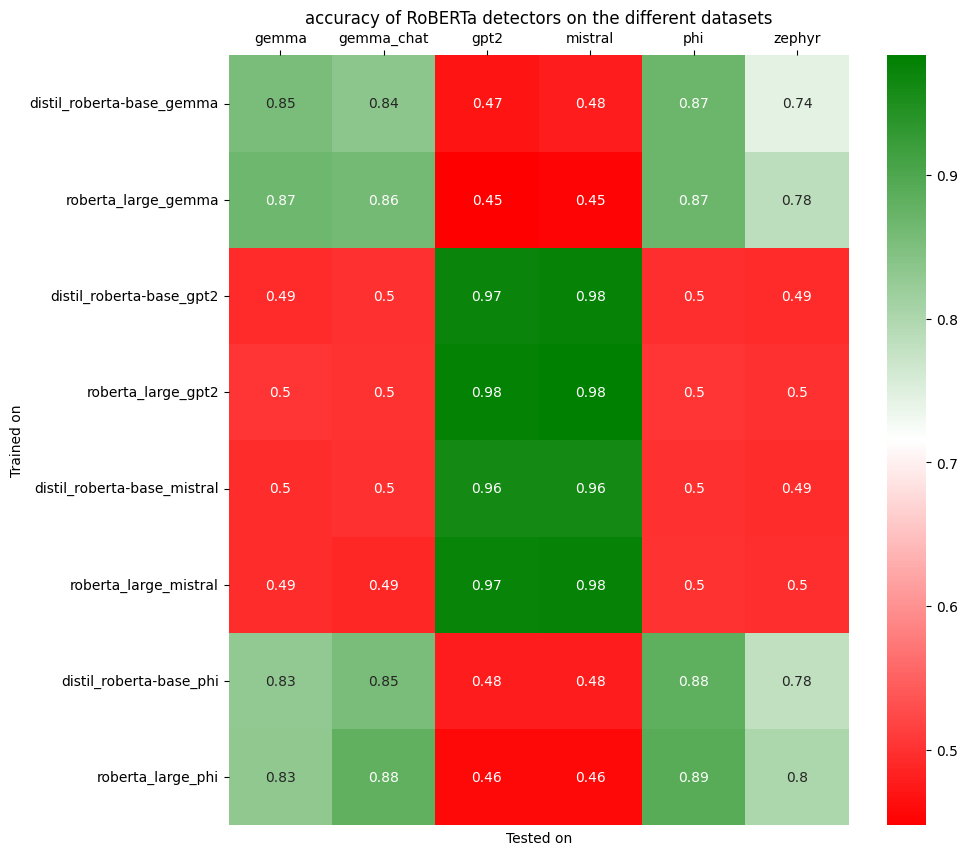

In [55]:
"""
# detector trained on gpt-2 samples
detector_gpt2_results_path = "./outputs_freeze_base/roberta/25_03_1611/test/"

# detector trained on mistral samples
detector_mistral_results_path = "./outputs_full_finetuning/roberta/25_03_1240/test/"
"""


training_method = "freeze_base"
#detectors =["distil_roberta-base"]
trained_on_models = {"distil_roberta-base": {"04_04_0958":"gpt2", "04_04_1001": "phi", "04_04_1004": "gemma", "04_04_1007": "mistral"},
                    "roberta_large": {"04_04_0958":"gpt2", "04_04_1010": "phi", "04_04_1023": "gemma", "04_04_1034": "mistral"}}


dataset_names = ["gpt2", "phi", "gemma", "mistral", "gemma_chat", "zephyr"]


freeze_base_df = create_df_from_test_logs("freeze_base", trained_on_models, dataset_names)
heatmap_from_df(freeze_base_df, "accuracy")

In [12]:
freeze_base_df["detector"].unique()

array(['distil_roberta-base_gemma', 'distil_roberta-base_gpt2',
       'distil_roberta-base_mistral', 'distil_roberta-base_phi',
       'roberta_large_gemma', 'roberta_large_gpt2',
       'roberta_large_mistral', 'roberta_large_phi'], dtype=object)

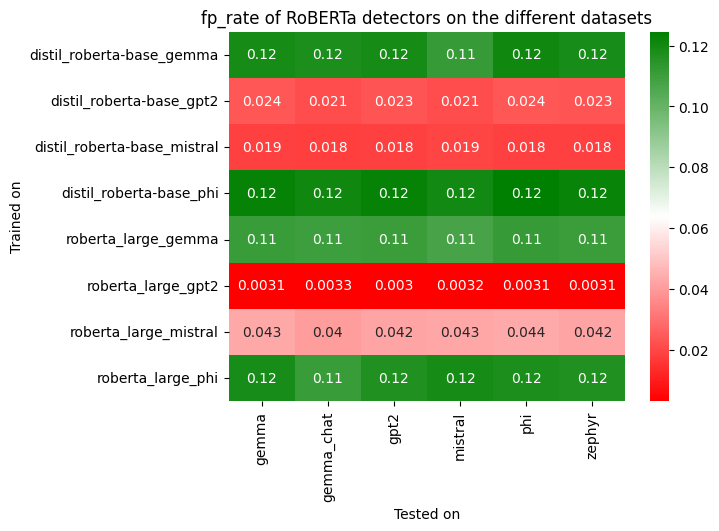

In [8]:
heatmap_from_df(freeze_base_df, "fp_rate")

## full_finetuning

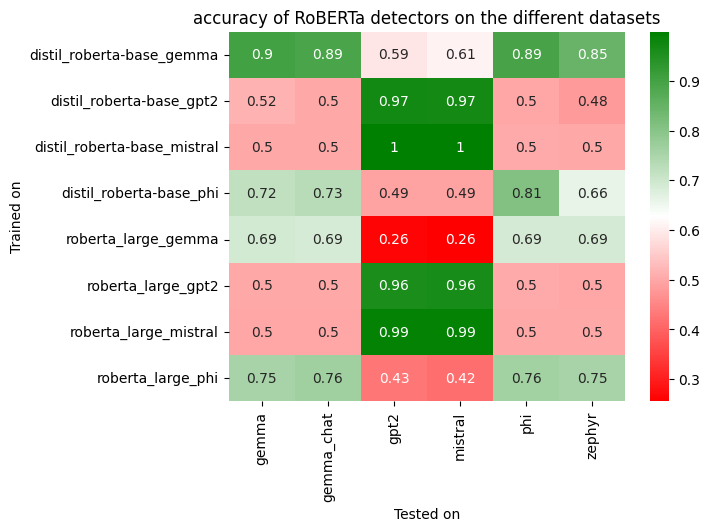

In [9]:
training_method = "full_finetuning"
trained_on_models = {"distil_roberta-base": {"04_04_1031":"gpt2", "04_04_1032": "phi", "04_04_1033": "gemma", "04_04_1035": "mistral"},
                    "roberta_large": {"04_04_1141":"gpt2", "04_04_1145": "phi", "04_04_1147": "gemma", "04_04_1149": "mistral"}}


freeze_base_df = create_df_from_test_logs("full_finetuning", trained_on_models, dataset_names)
heatmap_from_df(freeze_base_df, "accuracy")

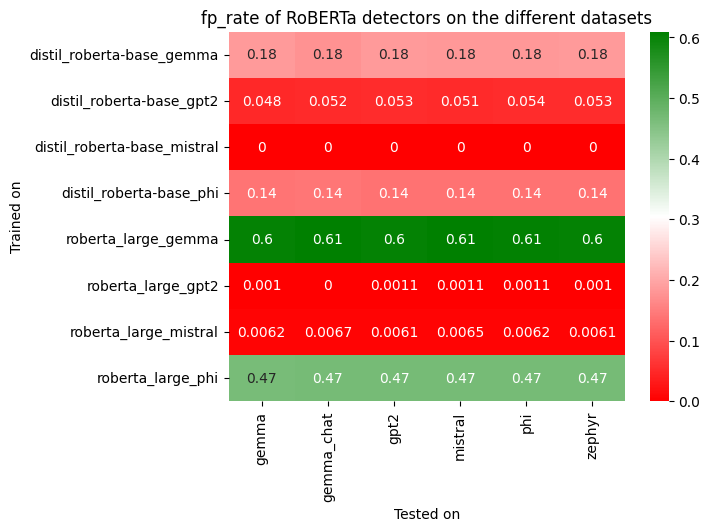

In [10]:
heatmap_from_df(freeze_base_df, "fp_rate")